In [9]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import eye
# from sklearn import metrics
from scipy.sparse.linalg import inv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
import matplotlib.pyplot as plt

In [10]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

In [11]:
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

In [12]:
healthy_df = pd.read_excel('features_30_9_healthy.xlsx', header=None)

In [13]:
healthy_df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.09242,0.58207,0.84332,1.85755,0.75574,9.51179,6.68282,3.31333,3.98427,0.32795,...,4.82094,4539.14893,9787,12757,5068,7689,1721357.125,1312.00500,1,AAL09091956__20181106__12038__CT__HEAD__0002__...
1,0.06342,0.96902,0.74959,1.93489,0.67394,6.65879,6.44094,3.35085,4.40313,0.47218,...,4.26796,2038.07898,10136,12932,8039,4893,702499.750,838.15259,1,AAL09091956__20181106__12038__CT__HEAD__0002__...
2,0.10062,0.68576,0.79684,1.68772,0.73787,9.50464,6.04032,3.17706,3.93885,0.38197,...,4.53904,4157.31250,9961,12583,5592,6991,1237559.375,1112.45642,1,AAL09091956__20181106__12038__CT__HEAD__0002__...
3,0.05449,0.74973,0.87516,3.00270,0.71925,7.70397,10.57323,3.66807,4.57908,0.39824,...,5.20089,3706.43335,8388,12233,4544,7689,2748470.500,1657.85120,1,AAL09091956__20181106__12038__CT__HEAD__0002__...
4,0.07776,0.70084,0.85559,2.42659,0.73281,8.71716,8.64065,3.42859,4.24003,0.38487,...,5.10152,4775.73877,9088,12583,3845,8738,2867137.750,1693.26245,1,AAL09091956__20181106__12038__CT__HEAD__0002__...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,0.06155,0.69752,0.89054,3.18606,0.74120,7.02580,11.77003,3.62602,4.42574,0.39767,...,4.90722,3821.18237,5915,10883,2129,8754,3848079.250,1961.65222,1,ZSA29101953__20170511__6862__CT__HEAD__0002__b...
2104,0.06068,0.75961,0.86736,2.86349,0.71831,7.67092,10.40712,3.60249,4.47293,0.40430,...,4.86279,4307.60449,5678,10646,1656,8990,3530869.500,1879.06079,1,ZSA29101953__20170511__6862__CT__HEAD__0002__b...
2105,0.09644,0.70322,0.85896,2.49303,0.74774,6.01145,9.14703,3.34126,4.10024,0.41432,...,4.70639,3502.35352,4495,10646,1420,9226,3042845.750,1744.37549,1,ZSA29101953__20170511__6862__CT__HEAD__0002__b...
2106,0.12647,0.66081,0.88106,2.77796,0.75613,5.16639,10.15986,3.13970,3.91218,0.39423,...,4.47165,2767.90771,4022,10410,1656,8754,3174905.250,1781.82642,1,ZSA29101953__20170511__6862__CT__HEAD__0002__b...


In [14]:
nneg = len(healthy_df)  # number of rows of healthy_df
healthy_names = healthy_df.iloc[:,32]  # all file names of healthy_df
unique_healthy_names = healthy_names.unique()  # unique file names of healthy_df
iN = healthy_names.factorize()[0]  # index of unique file names
n_files = len(unique_healthy_names)  # number of unique files

Xneg = healthy_df.iloc[:,:31]  # healthy_df feautures

In [15]:
insult_df = pd.read_excel('features_30_9_insult.xlsx', header=None)

In [16]:
insult_df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.06081,0.75858,0.85508,2.61725,0.71279,9.07447,9.53269,3.54796,4.38729,0.39242,...,3644.60889,7689,10486,4019,6467,1706812.750,1306.45044,0.09679,0.44111,AAL09091956__20181106__12038__CT__HEAD__0002__...
1,0.05805,0.80593,0.86047,2.88797,0.70327,8.43171,10.18995,3.56138,4.49190,0.41046,...,3413.93018,7340,10486,4019,6467,1868834.875,1367.05334,0.14702,0.57444,AAL09091956__20181106__12038__CT__HEAD__0002__...
2,0.05735,0.80487,0.86085,2.89208,0.69992,8.27271,10.48810,3.61427,4.52479,0.40255,...,3305.78662,6990,10311,3845,6466,1798897.125,1341.22974,0.19660,0.60778,AAL09091956__20181106__12038__CT__HEAD__0002__...
3,0.07138,0.60490,0.87878,2.49509,0.74577,7.20000,9.16320,3.48943,4.20273,0.32976,...,3614.73560,7340,11884,3845,8039,2424746.750,1557.15979,0.24542,0.55333,AAL09091956__20181106__12038__CT__HEAD__0002__...
4,0.06371,0.61074,0.88761,2.71714,0.74178,8.10054,9.98028,3.60307,4.32808,0.32754,...,4149.30322,8214,12058,3845,8213,2890672.500,1700.19775,0.29329,0.48111,AAL09091956__20181106__12038__CT__HEAD__0002__...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,0.06646,0.65228,0.89100,2.99205,0.75269,8.06304,10.62932,3.63314,4.42857,0.38109,...,4524.91455,6861,11120,2129,8991,3640547.750,1908.02197,0.55711,0.62222,ZSA29101953__20170511__6862__CT__HEAD__0002__b...
5931,0.06672,0.58668,0.89720,2.85336,0.75804,8.28487,10.18638,3.62216,4.34481,0.33563,...,4755.65234,6861,11120,1893,9227,3537324.750,1880.77771,0.45430,0.67111,ZSA29101953__20170511__6862__CT__HEAD__0002__b...
5932,0.07679,0.60400,0.87018,2.32624,0.75293,8.35847,8.05221,3.45328,4.18973,0.34140,...,4798.49463,6861,11120,1893,9227,2920900.750,1709.06421,0.34919,0.69000,ZSA29101953__20170511__6862__CT__HEAD__0002__b...
5933,0.07262,0.62511,0.87357,2.47208,0.74652,8.93944,8.51236,3.49029,4.25676,0.34790,...,5113.42432,7098,11120,1893,9227,3107574.750,1762.83142,0.24275,0.63889,ZSA29101953__20170511__6862__CT__HEAD__0002__b...


In [17]:
insult_32_feature = insult_df.iloc[:,31]  # вероятности больных по расст от центра
insult_33_feature = insult_df.iloc[:,32]  # вероятности больных по пересеч с маской

In [18]:
insult_33_feature.where(insult_33_feature<0.95, other=1, inplace=True)
big_prob_33_feature = insult_33_feature > 0.05  # there is no feature less than 0.05
insult_32_feature = insult_32_feature[big_prob_33_feature]
insult_33_feature = insult_33_feature[big_prob_33_feature]

In [19]:
Y_pos_0 = pd.concat([insult_33_feature, pd.Series(np.zeros((nneg,), dtype=int))], axis=0)  # вероятности больных

In [20]:
Y_pos_0  # вероятности больных

0       0.44111
1       0.57444
2       0.60778
3       0.55333
4       0.48111
         ...   
2103    0.00000
2104    0.00000
2105    0.00000
2106    0.00000
2107    0.00000
Length: 8043, dtype: float64

In [21]:
insult_names = insult_df.iloc[:,33]  # all file names of insult_df
insult_names = insult_names[big_prob_33_feature]

Xpos = insult_df[big_prob_33_feature].iloc[:,:31]  # features of insult_df
npos = len(Xpos)

In [22]:
unique_insult_names = insult_names.unique()  # unique file names in insult_df
iP = insult_names.factorize()[0]  # index of unique file names

In [23]:
indexes = np.concatenate([iP, iN], axis=0)
X0 = pd.concat([Xpos, Xneg], axis=0)

In [24]:
# mu = X0.mean()
# sig = X0.std()
# X0 = (X0 - mu)/sig

In [25]:
from sklearn.preprocessing import StandardScaler
X0 = StandardScaler().fit_transform(X0)
X0

array([[-0.65880963, -0.38859229,  0.9987118 , ..., -1.58812658,
        -1.00135234, -1.37247333],
       [-0.76895182, -0.17676591,  1.0684445 , ..., -1.58812658,
        -0.99569497, -1.34909682],
       [-0.79688644, -0.18150796,  1.07336072, ..., -1.58820081,
        -0.99813701, -1.35905782],
       ...,
       [ 0.76306219, -0.63625244,  1.048909  , ..., -1.38332625,
        -0.95470178, -1.20355137],
       [ 1.9614571 , -0.82597909,  1.33482602, ..., -1.41836277,
        -0.95009063, -1.18910533],
       [ 1.83176068, -0.84539464,  1.28217071, ..., -1.20762405,
        -0.88006393, -0.99846652]])

In [26]:
X_normalized = normalize(X0)
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [27]:
# convert the DataFrame into 2D DataFrame for visualization
pca= PCA(n_components=2)
principal_comp=pca.fit_transform(X_normalized)
pca_df=pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,0.186234,-0.290522
1,0.159787,-0.444758
2,0.169751,-0.460770
3,0.513060,-0.054418
4,0.541057,-0.202080


In [28]:
indexes

array([ 0,  0,  0, ..., 45, 45, 45], dtype=int64)

In [29]:
n = npos + nneg
Y1M0 = pd.concat([insult_33_feature, pd.Series(np.zeros((nneg,), dtype=int))], axis=0)  # вероятности больных по маскам

In [30]:
# quality metrics
qual_1 = np.zeros((5,), dtype=int)
qual_2 = np.zeros((5,), dtype=int)

In [31]:
n_certain_files = 0
n_uncertain_files = n_files - 1
n_test_files = n_files - n_uncertain_files - n_certain_files

In [32]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(X0)
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
labels = clustering.labels_
np.unique(labels)

array([0, 1], dtype=int64)

## Finding optimal eps value for DBSCAN

In [ ]:
from sklearn.metrics import silhouette_score
#epss = [2.3,2.5,2.7]
for i in epss:
    db = DBSCAN(eps=2, min_samples = 3).fit(X0)
    core_sample_mask = np.zeros_like(db.labels_, dtype=bool)
    core_sample_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    vals, unq_count = np.unique(labels, return_counts=True)
    print(vals)
    print(unq_count)
    if len(np.unique(labels)) > 1:  # if number of clusters are more than 1
        silhouette_avg = silhouette_score(X0, labels)
        print('for eps = {0} avg silhuette score = {1}'.format(i,silhouette_avg))

In [ ]:
from sklearn.metrics import silhouette_score
epss = [2, 2.3, 2.5, 2.7, 3, 3.5, 3.8]
for i in epss:
    db = DBSCAN(eps=i, min_samples = 5).fit(X0)
    core_sample_mask = np.zeros_like(db.labels_, dtype=bool)
    core_sample_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    vals, unq_count = np.unique(labels, return_counts=True)
    print(vals)
    print(unq_count)
    if len(np.unique(labels)) > 1:  # if number of clusters are more than 1
        silhouette_avg = silhouette_score(X0, labels)
        print('for eps = {0} avg silhuette score = {1}'.format(i,silhouette_avg))
    print('--------------------------------------------')

In [ ]:
from sklearn import metrics
# Compute DBSCAN
db = DBSCAN(eps=1.15, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Y1M0, labels))
print("Completeness: %0.3f" % metrics.completeness_score(Y1M0, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(Y1M0, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(Y1M0, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(Y1M0, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# Hyperparameter tuning

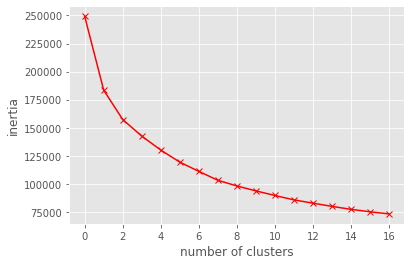

In [91]:
from sklearn.cluster import KMeans
n_clusters=18
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(n_clusters = i)
    kmean.fit_predict(X0)
    cost.append(kmean.inertia_)  
    
plt.plot(cost, 'bx-', color='red')    
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [95]:
# Spectral clustering
def train_spectral(k,X):
  spectral_model = SpectralClustering(n_clusters=k)
  y_pred = spectral_model.fit_predict(X)
  print("Spectral Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

# Agglomerative clustering
def train_Agglomerative(linkage,k,X):
  agglo_model = AgglomerativeClustering(linkage=linkage,n_clusters=k)
  y_pred = agglo_model.fit_predict(X)
  print("Agglomerative Clustering : clusters : ",k," linkage : ",linkage," silhouette_score : ",silhouette_score(X,y_pred) )

# GaussianMixture Model based clustering
def train_GaussianMixture(k,X):
  GaussianMixture_model = GaussianMixture(n_components=k)
  y_pred = GaussianMixture_model.fit_predict(X)
  print("GaussianMixture Model based Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

In [104]:
clusters = [2, 3, 4, 5, 6]
for i in clusters:
    train_spectral(i, pca_df)

Spectral Clustering : clusters :  2  silhouette_score :  0.7036473775607119
Spectral Clustering : clusters :  3  silhouette_score :  0.771132968295761
Spectral Clustering : clusters :  4  silhouette_score :  0.7710867758189552
Spectral Clustering : clusters :  5  silhouette_score :  0.7042166048759584
Spectral Clustering : clusters :  6  silhouette_score :  0.6478532896651277


In [119]:
labels = SpectralClustering(n_clusters=2, affinity='rbf').fit_predict(pca_df)

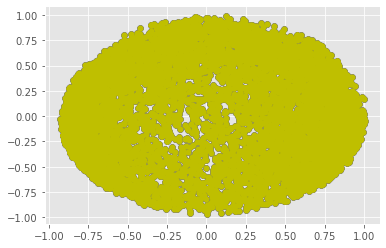

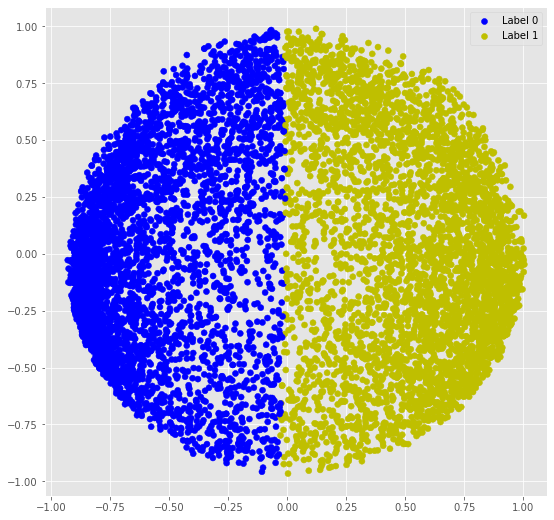

In [120]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# Plotting the clustered scatter plot
  
b = plt.scatter(pca_df['pca1'], pca_df['pca2'], color ='b');
y = plt.scatter(pca_df['pca1'], pca_df['pca2'], color ='y');
  
plt.figure(figsize =(9, 9))
plt.scatter(pca_df['pca1'], pca_df['pca2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [121]:
silhouette_score(X0, labels)

0.23824139654654303

In [122]:
labels = SpectralClustering(n_clusters=2, affinity ='nearest_neighbors').fit_predict(pca_df)

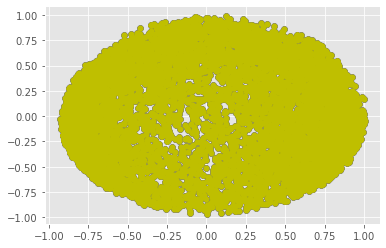

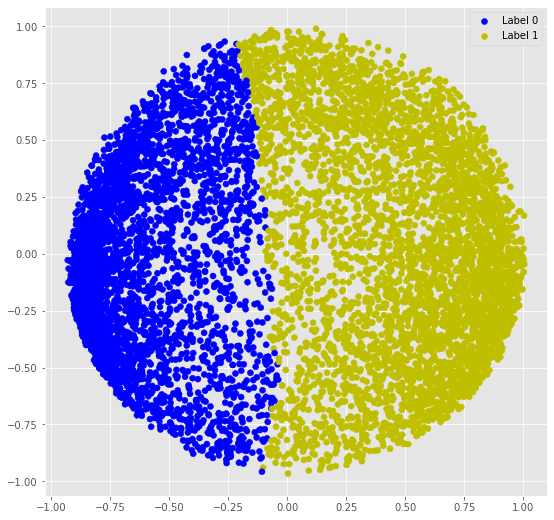

In [123]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# Plotting the clustered scatter plot
  
b = plt.scatter(pca_df['pca1'], pca_df['pca2'], color ='b');
y = plt.scatter(pca_df['pca1'], pca_df['pca2'], color ='y');
  
plt.figure(figsize =(9, 9))
plt.scatter(pca_df['pca1'], pca_df['pca2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [124]:
silhouette_score(X0, labels)

0.2310979393460293

In [79]:
from sklearn.cluster import DBSCAN
from scipy.sparse import hstack

def clus_en_matrix(X, L):
    l=L
    n = len(X)
    #for l in range(1,L+1):
    C = DBSCAN(eps=l, min_samples=5).fit(X)
    c_mem = C.labels_
    c_mem[c_mem==-1]=1
    print(c_mem)
    print(len(np.unique(c_mem)))
        
    A_m = csr_matrix((np.ones(n, dtype='int'),
                (np.arange(n),c_mem)), shape=(n,len(np.unique(c_mem))))
    #print(A_m[l].shape)
        
    A = A_m
    A = np.sqrt(1/L)*A
    return A


In [ ]:
pd.set_option('display.max_columns', 6)

[ 0  1  0 ...  1 30 30]
53
0

 ROC CURVE PARAMETERS:

Threshold: 0.6271054647044007
Distance: [0.17360241]
Sensitivity: 0.8823529411764706
Specificity: 0.8723404255319149
Accuracy: 0.8797814207650273
PPV: 0.9523809523809523
NPV: 0.7192982456140351
FNR: 0.11764705882352941
FPR: 0.1276595744680851
FDR: 0.047619047619047616
FOR: 0.2807017543859649
F1 score: 0.916030534351145
TP: 120
FP: 6
FN: 16
TN: 41
[1 0 0 ... 1 1 1]
53
1

 ROC CURVE PARAMETERS:

Threshold: 0.7084734799059669
Distance: [0.21809958]
Sensitivity: 0.8636363636363636
Specificity: 0.8297872340425532
Accuracy: 0.8576779026217228
PPV: 0.9595959595959596
NPV: 0.5652173913043478
FNR: 0.13636363636363635
FPR: 0.1702127659574468
FDR: 0.04040404040404041
FOR: 0.43478260869565216
F1 score: 0.9090909090909091
TP: 190
FP: 8
FN: 30
TN: 39
[1 0 0 ... 1 1 1]
53
2

 ROC CURVE PARAMETERS:

Threshold: 0.7487802091070415
Distance: [0.22384557]
Sensitivity: 0.8662420382165605
Specificity: 0.8205128205128205
Accuracy: 0.8571428571428571
PPV: 

IndexError: index -1 is out of bounds for axis 0 with size 0

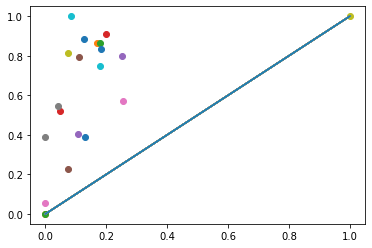

In [80]:
import warnings
warnings.filterwarnings('ignore')

for n_file in range(n_files):
    inp_files = [i for i in range(n_files) if i!=n_file] + [n_file]
    inp = []
    for j in range(n_files):
        ind_files = [i for i, x in enumerate(indexes) if x==inp_files[j]]  # all indexes with number 1,2,3,...,46,1
        inp.extend(ind_files)  # concatenate indexes in loop
    new_indexes = indexes[inp]  # новый порядок объектов
    
    # какие объекы в последних контрольных снимках
    tes_test = np.isin(indexes, inp_files[len(inp_files)-n_test_files:len(inp_files)])  # inp_files[46:46]
    n_test_0 = sum(tes_test)  # количество объектов в контрольной выборке = 277
        
    # какие объекы в неточных снимках
    tes_uncertain = np.isin(indexes, inp_files[n_certain_files:n_certain_files+n_uncertain_files])  # 1,2,...,45
    n_uncertain = sum(tes_uncertain)  # количество объектов в неточной выборке = 7766
        
    # какие объекы в точных снимках
    tes_certain = np.isin(indexes, inp_files[:n_certain_files])  # empty
    n_certain = sum(tes_certain)  # количество объектов в точной выборке = 0
        
    X = X0.iloc[inp]
    Y_pos = Y_pos_0.iloc[inp]
    Y1M = Y1M0.iloc[inp]
    
    ind_insult = Y1M==1  # уверенно классиф как больные
    ind_healthy = Y1M==0  # уверенно классиф как здоровые
    ind_certain = np.logical_or(ind_insult,ind_healthy)  # 4958 уверенно классифицированных данных
    
    Y10Tr = np.array([[*ind_insult[:n_certain], *Y_pos[n_certain:n_certain+n_uncertain], *pd.Series(np.zeros((n_test_0,), dtype=int))],
                      [*ind_healthy[:n_certain], *(1-Y_pos[n_certain:n_certain+n_uncertain]), *pd.Series(np.zeros((n_test_0,), dtype=int))]]).T
    
    Y1MC = Y1M[n-n_test_0:len(Y1M)]  # 8043-277 : 8043 (last)
    Y_true_test = 1+(Y1MC[ind_certain[n-n_test_0:len(ind_certain)]]==0)
    
#     Y10Tr2 = Y10Tr
#     ind_uncertain = np.logical_not(ind_certain)
#     Y10Tr2[ind_uncertain][n_certain:n-n_test_0, :] = 0
    
    #print(Y10Tr2)
    
    sigma = 1.25
    bet = 0.001
    mmax = 1000
    G = bet * eye(n, dtype='int') + csr_matrix(([*pd.to_numeric(ind_certain[:n_certain], errors='coerce'),
                 *np.ones(n_uncertain, dtype='int'),
                 *np.zeros(n_test_0, dtype='int')],
                (np.arange(n),np.arange(n))), shape=(n,n))
    G2 = bet * eye(n, dtype='int') + csr_matrix(([*pd.to_numeric(ind_certain[:n-n_test_0], errors='coerce'),
                  *np.zeros(n_test_0, dtype='int')],
                (np.arange(n),np.arange(n))), shape=(n,n))
    
    A = clus_en_matrix(X,1.15)
    m = A.shape[1]  # 1046 in order of 1055
    u = A.sum(axis = 0)  # by columns
    dd = A * u.conj().transpose()  # 8043x1 array
    dd[dd<0] = 0
    D = csr_matrix(([item for sublist in dd.tolist() for item in sublist], 
                    (np.arange(n), np.arange(n))), shape=(n,n), dtype='int')
    D = csr_matrix((1/np.sqrt(D.diagonal()),
                    (np.arange(n), np.arange(n))), shape=(n,n))
    U = D*A
    Gm = csr_matrix((1/G.diagonal(),
                    (np.arange(n), np.arange(n))), shape=(n,n))
    A1 = bet * Gm * U
    A2 = eye(m, dtype='int') - bet*(U.conj().transpose() * Gm)*U

    F = np.empty(shape=[n,K]) 
    for k in range(K):
        A3 = inv(A2) * (U.conj().transpose() * Gm * Y10Tr[:,k])
        F[:,k] = Gm * Y10Tr[:,k] + A1 * A3
        
    #F = F/F.sum(axis = 1).reshape((n,1))  # нормировка
    Ff = F[n-n_test_0:,]
    Ft = Ff[ind_certain[n-n_test_0:],]

    class11 = Ft[Y_true_test==2, 0]  # negative
    class21 = Ft[Y_true_test==1, 0]  # positive
    # roc_curve(class11, class21, 1)
    print(n_file)

    roc_data = roc_curve(class11, class21, 1, 1)
    plt.plot(roc_data['threshold_x'], roc_data['threshold_x'])
    plt.scatter(roc_data['x'], roc_data['y'])
plt.title('roc_curve')
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')

plt.show()

In [25]:
import matplotlib.pyplot as plt

def roc_curve(class_1, class_2, disp_data, disp_plot=0):  # negative, positive
#     rng(1337,'twister')
#     s = rng
#     class_1 = rand(1,3);
#     rng(s)
#     class_2 = 0.5*rand(1,5);
#     sispt = 1;
#     dispp = 1;

#     np.random.seed(1337)
#     class_1 = np.random.rand(1,3)
#     np.random.seed(1337)
#     class_2 = 0.5*np.random.rand(1,3)

    # Calculating the threshold values between the data points
    s_data = np.sort(np.unique(np.concatenate([class_1, class_2], axis=0)))
    s_data = s_data[s_data!=np.array(None)]
    d_data = np.diff(s_data)
    if np.all(d_data==0):
        print('Both class are the same!')
    d_data = np.append(d_data, d_data[-1])
    thres = np.empty(len(s_data)+1)
    thres[0] = s_data[0] - d_data[0]
    thres[1:len(thres)] = s_data + d_data/2

    # Calculating the sensibility and specificity of each threshold
    curve = np.zeros((len(thres),2))
    distance = np.zeros((len(thres),1))
    for id_t in range(len(thres)):
        TP = np.sum(class_2 >= thres[id_t])
        FP = np.sum(class_1 >= thres[id_t])
        FN = np.sum(class_2 < thres[id_t])
        TN = np.sum(class_1 < thres[id_t])

        curve[id_t, 0] = TP/(TP+FN or 1)  # sensitivity - TPR
        curve[id_t, 1] = TN/(TN+FP or 1)  # specificity - FPR

        distance[id_t] = np.sqrt((1-curve[id_t, 0])**2 + (curve[id_t,1]-1)**2)

    # Optimum threshold and parameters
    #opt = np.min(distance)  # 1
    opt = np.argmin(distance)
    TP = np.sum(class_2 >= thres[opt])
    FP = np.sum(class_1 >= thres[opt])
    FN = np.sum(class_2 < thres[opt])
    TN = np.sum(class_1 < thres[opt])

    if disp_data==1:
        print('\n ROC CURVE PARAMETERS:\n')
        print('Threshold:', thres[opt])
        print('Distance:', distance[opt])
        print('Sensitivity:', curve[opt,0])
        print('Specificity:', curve[opt,1])
        print('Accuracy:', (TP+TN)/(TP+TN+FP+FN or 1))
        print('PPV:', TP/(TP+FP or 1))
        print('NPV:', TN/(TN+FN or 1))
        print('FNR:', FN/(FN+TP or 1))
        print('FPR:', FP/(FP+TN or 1))
        print('FDR:', FP/(FP+TP or 1))
        print('FOR:', FN/(FN+TN or 1))
        print('F1 score:', 2*TP/(2*TP+FP+FN or 1))
        print('TP:', TP)
        print('FP:', FP)
        print('FN:', FN)
        print('TN:', TN)
        
    if disp_plot == 1:
        result = {}
        result['threshold_x'] = 1-curve[:,1]
        result['threshold_y'] = curve[:,0]
        result['x'] = 1-curve[opt,1]  # specificity
        result['y'] = curve[opt,0]  # sensitivity        
        return result
        